In [1]:
import pandas as pd 
import numpy as np 
import cv2
import matplotlib.pyplot as plt
from PIL import Image

Since the image of chestxray contain 4 images we will reuse the click event function to obtain the necessary coordinates for the image. 

In [2]:
def click_event(event, x, y, flags, params): 
 
    if event == cv2.EVENT_LBUTTONDOWN: 
        print(x, ' ', y) 
        font = cv2.FONT_HERSHEY_SIMPLEX 
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font, 
                    1, (3000, 0, 0), 2) 
        cv2.imshow('image', img) 
  

    if event==cv2.EVENT_RBUTTONDOWN: 
        print(x, ' ', y) 
        font = cv2.FONT_HERSHEY_SIMPLEX 
        b = img[y, x, 0] 
        g = img[y, x, 1] 
        r = img[y, x, 2] 
        cv2.putText(img, str(b) + ',' +
                    str(g) + ',' + str(r), 
                    (x,y), font, 1, 
                    (3000, 4000, 0), 2) 
        cv2.imshow('image', img) 
  

In [3]:
if __name__=="__main__": 
    img=cv2.imread('chestxray.jpg' , 0)
    print(img.shape)
    cv2.imshow('image', img) 
  
    # setting mouse hadler for the image 
    # and calling the click_event() function 
    cv2.setMouseCallback('image', click_event) 
  
    # wait for a key to be pressed to exit 
    cv2.waitKey(0) 
  
    # close the window 
    cv2.destroyAllWindows() 

In [4]:
img=cv2.imread('chestxray.jpg' , 0)

After finding out coordinates for the chest image as well as the equalised chest image we will proceed with the histogram equaliser 

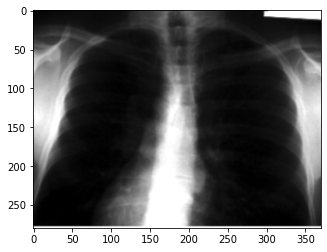

In [5]:
plt.imshow(img[0:280 , 0:370] , cmap = 'gray')

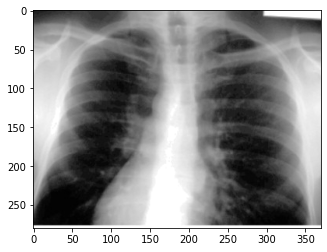

In [6]:
plt.imshow(img[350:630 , 0:370] , cmap = 'gray')

In [7]:
def get_histogram(image, bins):
    histogram = np.zeros(bins)
    for pixel in image:
        histogram[pixel] += 1
    return histogram
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)
def equalhist(img):
    img1 = np.asarray(img)
    flat = img1.flatten()
    hist = get_histogram(flat, 256)
    cs = cumsum(hist)
    nj = (cs - cs.min()) * 255
    N = cs.max() - cs.min()
    cs = nj / N
    cs = cs.astype('uint8')
    img_new = cs[flat]
    img_new = np.reshape(img_new, img1.shape)
    return (img_new)
def hist_plot(img):

    img_new = equalhist(img)
    img_cv2 = cv2.equalizeHist(img)
    
    fig = plt.figure(figsize=(12, 20))
    
    fig.add_subplot(3,2,2)
    plt.imshow(img, cmap = 'gray');
    fig.add_subplot(3,2,1)
    plt.hist(img.flatten(), bins=50, color = 'blue');
    plt.title("Image Histogram")
    
    fig.add_subplot(3,2,4)
    plt.imshow(img_new, cmap = 'gray');
    fig.add_subplot(3,2,3)
    plt.hist(img_new.flatten(), bins=50, color = 'black');
    plt.title("Histogram using implemented Equalisation function ")
    
    fig.add_subplot(3,2,6)
    plt.imshow(img_cv2, cmap = 'gray');
    fig.add_subplot(3,2,5)
    plt.hist(img_cv2.flatten(),  bins=50 ,color = 'brown');
    plt.title("Histogram using OpenCV function")

### Question 1 - Histogram Equalisation function implementation

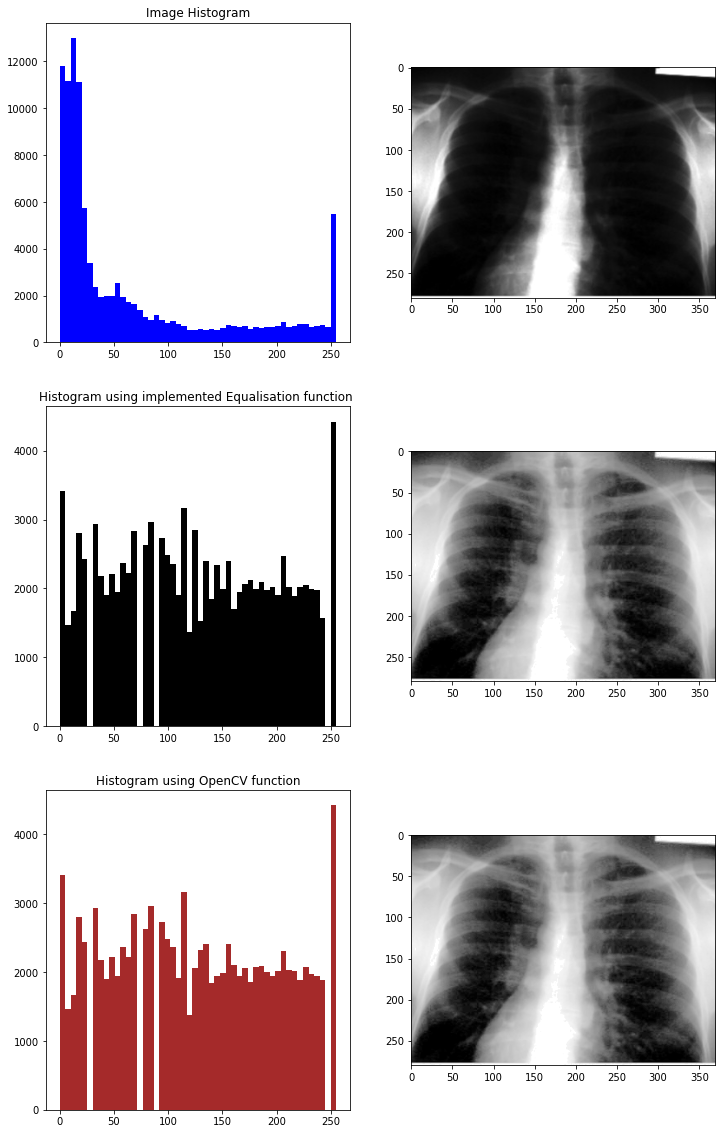

In [8]:
chest=cv2.imread('chestxray.jpg' , 0)
hist_plot(chest[0:280 , 0:370])

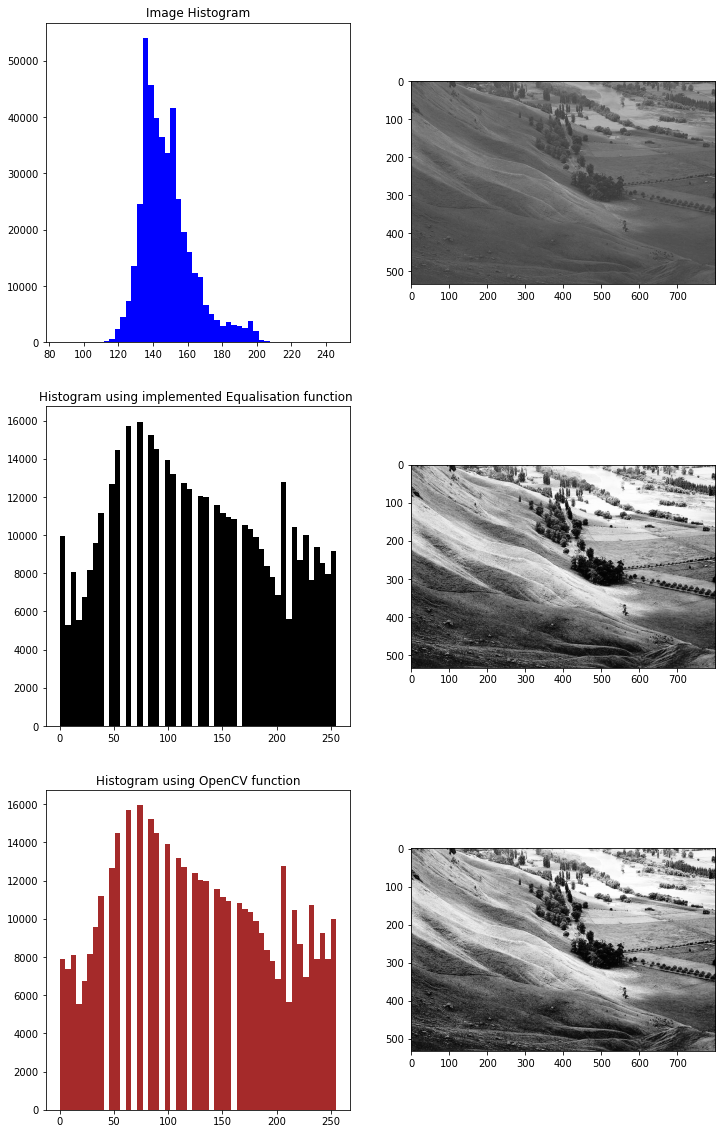

In [9]:
Hawkesbay=cv2.imread('Hawkesbay.jpg' , 0)
hist_plot(Hawkesbay)

### Question 2 - matching of histograms 

In [10]:
def _match_cumulative_cdf(source, template):

    src_values, src_unique_indices, src_counts = np.unique(source.ravel(),
                                                           return_inverse=True,
                                                           return_counts=True)
    tmpl_values, tmpl_counts = np.unique(template.ravel(), return_counts=True)

    src_quantiles = np.cumsum(src_counts) / source.size
    tmpl_quantiles = np.cumsum(tmpl_counts) / template.size

    interp_a_values = np.interp(src_quantiles, tmpl_quantiles, tmpl_values)
    return interp_a_values[src_unique_indices].reshape(source.shape)


def match_histograms(image, reference, multichannel=False):

    if image.ndim != reference.ndim:
        raise ValueError('Image and reference must have the same number '
                         'of channels.')

    if multichannel:
        if image.shape[-1] != reference.shape[-1]:
            raise ValueError('Number of channels in the input image and '
                             'reference image must match!')

        matched = np.empty(image.shape, dtype=image.dtype)
        for channel in range(image.shape[-1]):
            matched_channel = _match_cumulative_cdf(image[..., channel],
                                                    reference[..., channel])
            matched[..., channel] = matched_channel
    else:
        matched = _match_cumulative_cdf(image, reference)

    return matched

### Question 2a - plotting histograms 

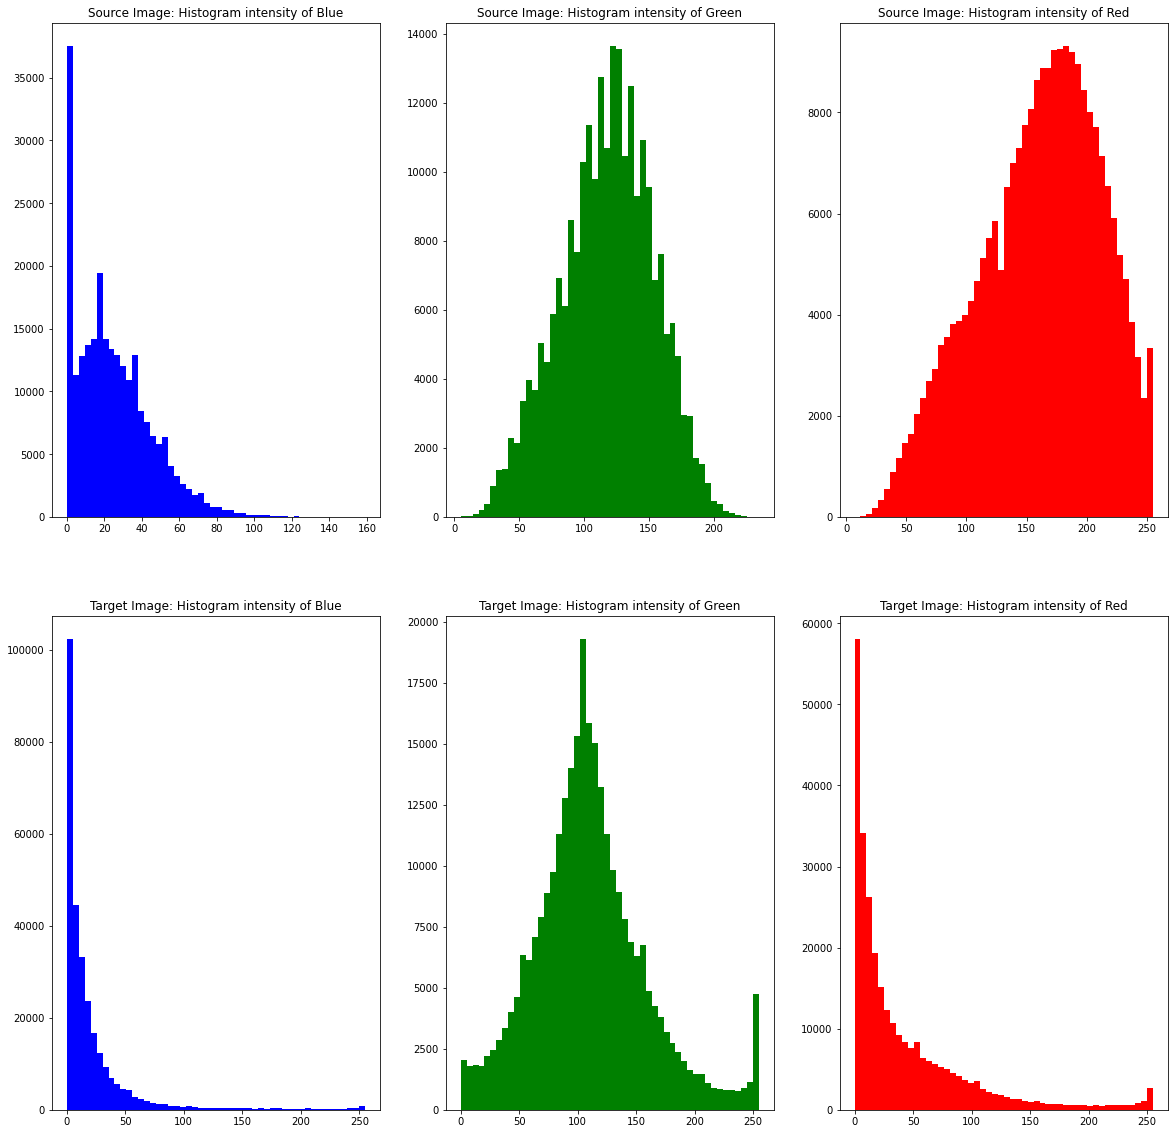

In [20]:
image1 = cv2.imread('image1.jpg')
image2 = cv2.imread('image2.jpg')


fig = plt.figure(figsize=(20, 20))

fig.add_subplot(2,3,1)
plt.hist(image1[:, :, 0].flatten(),bins = 50 ,  color = 'blue')
plt.title("Source Image: Histogram intensity of Blue")

fig.add_subplot(2,3,2) 
plt.hist(image1[:, :, 1].flatten(), bins = 50, color = 'green')
plt.title("Source Image: Histogram intensity of Green")

fig.add_subplot(2,3,3) 
plt.hist(image1[:, :, 2].flatten(), bins = 50, color = 'red')
plt.title("Source Image: Histogram intensity of Red")

fig.add_subplot(2,3,4) 
plt.hist(image2[:, :, 0].flatten(), bins = 50, color = 'blue') 
plt.title("Target Image: Histogram intensity of Blue")

fig.add_subplot(2,3,5) 
plt.hist(image2[:, :, 1].flatten(), bins = 50, color = 'green') 
plt.title("Target Image: Histogram intensity of Green")

fig.add_subplot(2,3,6) 
plt.hist(image2[:, :, 2].flatten(), bins = 50, color = 'red') 
plt.title("Target Image: Histogram intensity of Red")

plt.show()

### Question 2b - Matching histograms based on the implemented function and plotting the equalised histogram

Text(0.5, 1.0, 'Histogram intensity of matched red')

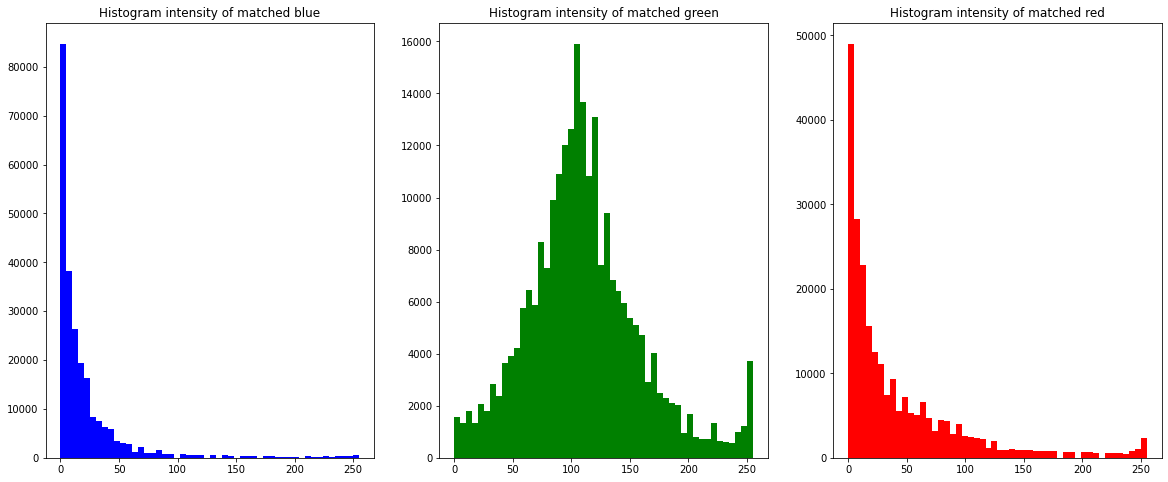

In [12]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(20)

fig.add_subplot(1,3,1)
blue_hist = match_histograms(image1[:, :, 0] , image2[:, :, 0] )
plt.hist(blue_hist.flatten(), bins =50, color = 'blue')
plt.title("Histogram intensity of matched blue")

fig.add_subplot(1,3,2)
green_hist = match_histograms(image1[:, :, 1] , image2[:, :, 1] )
plt.hist(green_hist.flatten(), bins =50, color = 'green')
plt.title("Histogram intensity of matched green")

fig.add_subplot(1,3,3)
red_hist = match_histograms(image1[:, :, 2] , image2[:, :, 2] )
plt.hist(red_hist.flatten(), bins =50, color = 'red')
plt.title("Histogram intensity of matched red")

### comparison of image with histogram matched with original image and reference image 

Text(0.5, 1.0, 'image- reference')

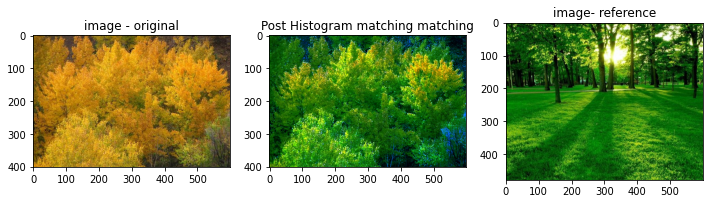

In [13]:
fig = plt.figure(figsize=(12, 8))

fig.add_subplot(1,3,2)
image_after_matching = cv2.merge([red_hist , green_hist, blue_hist])
image_after_matching = cv2.convertScaleAbs(image_after_matching)
plt.imshow(image_after_matching)
plt.title("Post Histogram matching matching")
fig.add_subplot(1,3,1)
plt.imshow(cv2.merge([image1[:, :, 2], image1[:, :, 1], image1[:, :, 0]]))
plt.title("image - original")

fig.add_subplot(1,3,3)
plt.imshow(cv2.merge([image2[:, :, 2], image2[:, :, 1], image2[:, :, 0]]))
plt.title("image- reference")

### question 3 

Text(0.5, 1.0, 'Image-equalised')

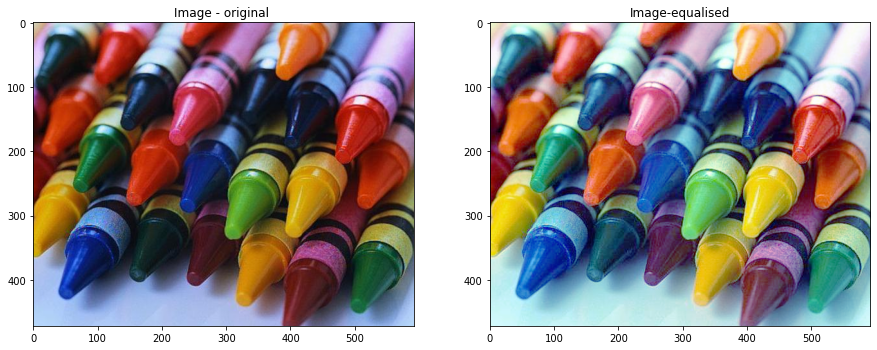

In [14]:
crayon = cv2.imread("crayons.jpg")


fig = plt.figure(figsize=(15, 16))

fig.add_subplot(1,2,1)
plt.imshow(cv2.merge([crayon[:, :, 2], crayon[:, :, 1], crayon[:, :, 0]]))
plt.title("Image - original ")


red_output = equalhist(crayon[:, :, 2]);
blue_output = equalhist(crayon[:, :, 0]);
green_output = equalhist(crayon[:, :, 1]);

fig.add_subplot(1,2,2);
plt.imshow(cv2.merge([red_output, green_output, blue_output]))
plt.title("Image-equalised")

Text(0.5, 1.0, 'Equalisation of Hue')

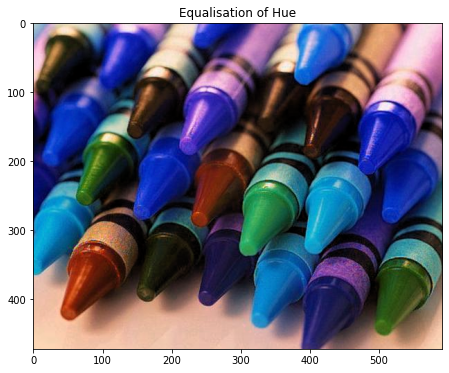

In [15]:
HSV_space = cv2.cvtColor(crayon, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(HSV_space)
v = equalhist(v)

hsv_image = cv2.merge([h, s, v])
out = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

plt.figure(figsize=(8 , 6))
plt.imshow(out)
plt.title("Equalisation of Hue")

In [16]:
from skimage import data
from skimage.util import img_as_ubyte

In [17]:
coins = img_as_ubyte(data.coins())

In [21]:
coins.shape

(303, 384)

### question 4 SWAHE

In [22]:
neighbourhood_size = 80

# or 
# neighbourhood_size = int(input('Choose a neighbourhood size'))

In [23]:
def hist_equal(cut_img):
    hist,bins = np.histogram(cut_img.flatten(),256,[0,256]);

    cdf = hist.cumsum()
    cdf = cdf / float(cdf.max())
    cdf = 255*(cdf)
    cdf = cdf.astype('uint8')
    return (cdf)

In [24]:
img = coins

n ,m = np.shape(img)
out_img = np.zeros((n,m))

for i in range(n):
    for j in range(m):
        
        left_x, left_y = max(0, i - neighbourhood_size), max(0, j - neighbourhood_size)
        right_x, right_y = min(n, i + neighbourhood_size), min(m, j + neighbourhood_size)
        intensity =  img[i][j]
        
        cut_img = img[left_x:right_x, left_y:right_y]
        cdf = hist_equal(cut_img)
        out_img[i][j] = cdf[intensity]    

Text(0.5, 1.0, 'SWAHE-output-with-neighbourhood-size-as-80')

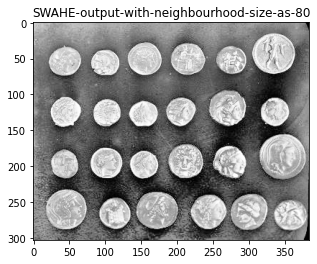

In [33]:
plt.imshow(out_img, cmap = "gray")
plt.title("SWAHE-output-with-neighbourhood-size-as-80")

### question 4 block division

Text(0.5, 1.0, 'block division')

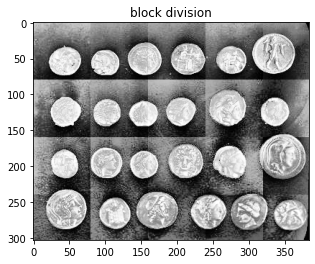

In [26]:
img = coins
n ,m = np.shape(img)
out_img_tile = np.zeros((n,m))

for i in range(0,n,neighbourhood_size):
    for j in range(0,m, neighbourhood_size):
        
        left_x, left_y = i, j
        right_x, right_y = min(n, i + neighbourhood_size), min(m, j + neighbourhood_size)
        
        cut_img = img[left_x:right_x, left_y:right_y]
        
        cdf = hist_equal(cut_img)

        out_img_tile[left_x:right_x, left_y:right_y] = cdf[img[left_x:right_x, left_y:right_y]]
        
plt.imshow(out_img_tile, cmap = "gray")
plt.title("block division")

### question 4 CLAHE

Text(0.5, 1.0, 'CLAHE-cv2-inbulit-function')

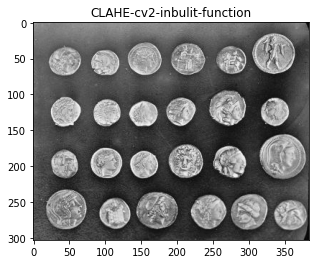

In [27]:
img = coins
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(10 , 10))
cl1 = clahe.apply(img)

plt.imshow(cl1, cmap = "gray")
plt.title('CLAHE-cv2-inbulit-function')

Text(0.5, 1.0, 'CLAHE-cv2-inbulit-function-clip-limit-2')

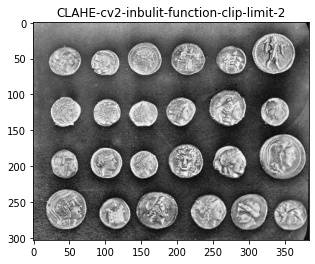

In [28]:
clahe_2 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10 , 10))
cl_2 = clahe_2.apply(img)

plt.imshow(cl_2, cmap = "gray")
plt.title('CLAHE-cv2-inbulit-function-clip-limit-2')

### question 5 

Text(0.5, 1.0, 'Range Highlight and Zero outside the range')

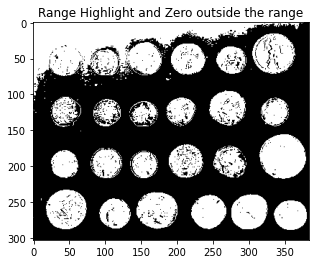

In [29]:
#  question a 

img = coins

highlight_range = [100, 200]

range_threshold_func = np.vectorize((lambda x: max(255, highlight_range[1] + 70) if (x >= highlight_range[0] and x <= highlight_range[1]) else 0))

img_out = range_threshold_func(img)

plt.imshow(img_out, cmap = "gray")
plt.title("Range Highlight and Zero outside the range")

Text(0.5, 1.0, 'Range Highlight only ')

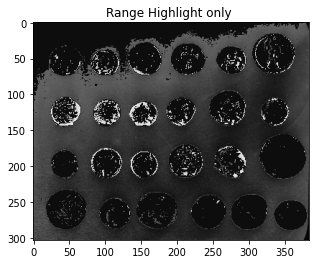

In [30]:
# question b 
img = coins

highlight_range = [100, 200]
range_threshold_func = np.vectorize((lambda x: max(255, highlight_range[1] + 70) if (x >= highlight_range[0] and x <= highlight_range[1]) else x))

img_out = range_threshold_func(img)

plt.imshow(img_out, cmap = "gray")
plt.title("Range Highlight only ")

### question 6 

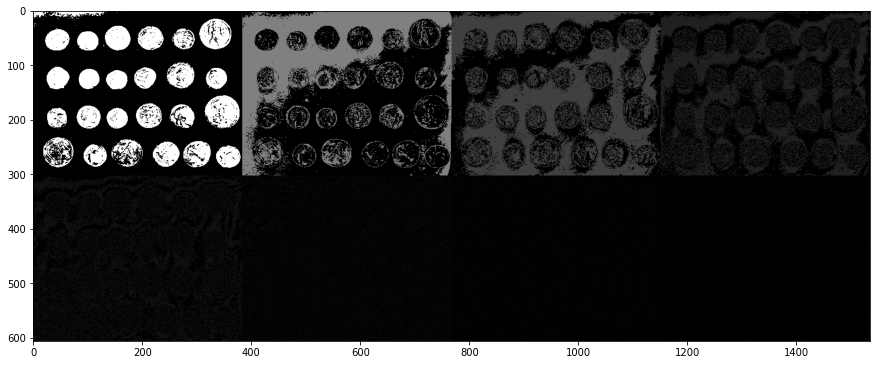

In [31]:
img = coins

lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) 

eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])
 

finalr = cv2.hconcat([eight_bit_img,seven_bit_img,six_bit_img,five_bit_img])
finalv =cv2.hconcat([four_bit_img,three_bit_img,two_bit_img,one_bit_img])
 
# Vertically concatenate
final = cv2.vconcat([finalr,finalv])
plt.figure(figsize=(15 , 15))
plt.imshow(final, cmap = "gray")

Text(0.5, 1.0, 'slicing on basis of bit')

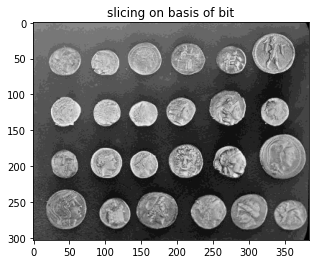

In [32]:
img_out = eight_bit_img+seven_bit_img+six_bit_img+five_bit_img
plt.imshow(img_out, cmap = "gray")
plt.title("slicing on basis of bit")